In [1]:
# Importa libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import gauss
import math
from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read required files 
avg_smse = pd.read_csv("datafile/smse.csv")
Arr = pd.read_csv("datafile/Arr.csv")
Drr = pd.read_csv("datafile/Drr.csv")
Alr = pd.read_csv("datafile/alr.csv")
Dlr = pd.read_csv("datafile/dlr.csv")
TC = pd.read_csv("datafile/TC.csv")
SM = pd.read_csv("datafile/SM.csv")
X = pd.read_csv("datafile/X.csv")

# Constant Variables 
N = 240
V = 441
NUM_SOURCE = 6
X1 = 21
X2 = 21

In [3]:
# Create the dataframe for rho and its average MSE 
def create_rho_list():
    """ Create a list of 21 rhos from 0 to 1 incremeting by 0.05 
    
    Returns a list of rho from 0 to 1 incremeting by 0.05 
    """
    rho = []
    r = 0.0
    for i in range(21):
        rho.append(round(r,2))
        r += 0.05
    return rho

rho = create_rho_list()
avg_smse['rho'] = rho
avg_smse = avg_smse.set_index('rho')

### MSE started to increase when rho = 0.7

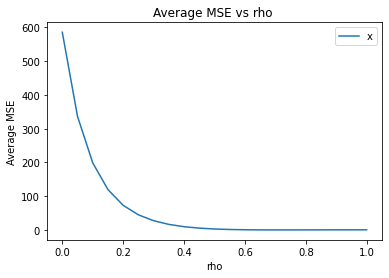

In [4]:
# Plot Average MSE vs rho
sns.lineplot(data = avg_smse)
plt.title("Average MSE vs rho ");
plt.xlabel("rho")
plt.ylabel("Average MSE")
plt.savefig("plots/average_mse")

### Q2.4

In [5]:
# Get the minimum rho 
smse_min = avg_smse.index[avg_smse['x'] == avg_smse['x'].min()]
rho_min = smse_min[0]

In [6]:
# Preprocessed and drop the unused columns 
Arr = Arr.drop(columns='Unnamed: 0')
Drr = Drr.drop(columns='Unnamed: 0')
TC = TC.drop(columns='Unnamed: 0')
SM = SM.drop(columns='Unnamed: 0')
X = X.drop(columns='Unnamed: 0')
Alr = Alr.T
Dlr = Dlr.rename(columns = {'V1':'0', 'V2':'1', 'V3':'2', 'V4':'3', 'V5':'4', 'V6':'5'})

In [7]:
# Calculate the sum of CtLR, CtRR, CsLR and CsRR and check it by printing

def check_correlation(NUM_SOURCE):
    ctrr = []
    csrr = []
    ctlr = []
    cslr = []
    for i in range(NUM_SOURCE):
        corr, _ = pearsonr(TC[str(i)], Drr[str(i)])
        ctrr.append(corr)

        corr2, _ = pearsonr(SM[str(i)], Arr[str(i)])
        csrr.append(corr2)

        corr3, _ = pearsonr(TC[str(i)], Dlr[str(i)])
        ctlr.append(corr3)

        corr4, _ = pearsonr(SM[str(i)], Alr[i])
        cslr.append(corr4)

    print("Sum of CtLR greater than Sum of CtRR: ", sum(ctrr) < sum(ctlr))
    print("Sum of CsLR greater than Sum of CsRR: ", sum(csrr) < sum(cslr))
    print("Sum of CtRR: " + str(sum(ctrr)))
    print("Sum of Ctlr: " + str(sum(ctlr)))
    print("Sum of Csrr: " + str(sum(csrr)))
    print("Sum of Cslr: " + str(sum(cslr)))

# Check correlation between LR and RR for D and A with TC and SM 
check_correlation(NUM_SOURCE)

Sum of CtLR greater than Sum of CtRR:  True
Sum of CsLR greater than Sum of CsRR:  True
Sum of CtRR: 5.386990826821092
Sum of Ctlr: 5.406527489085384
Sum of Csrr: 4.787877023981682
Sum of Cslr: 5.450079446203093


In [8]:
# Reshape A into 21 x 21 
A_rr = []
A_lr = []
arr = np.array(Arr.T)
alr = np.array(Alr.T)

for row in range(NUM_SOURCE):
    A_rr.append(arr[row].reshape((X1, X2)))
    A_lr.append(alr[row].reshape((X1, X2)))

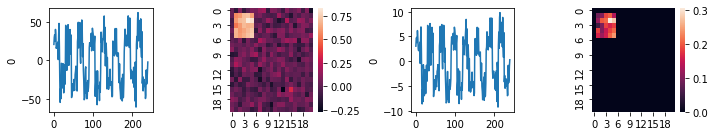

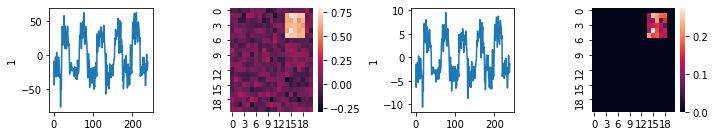

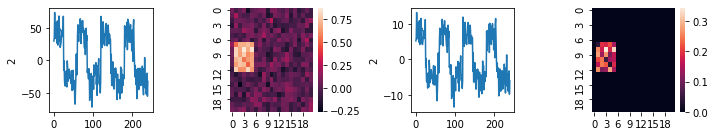

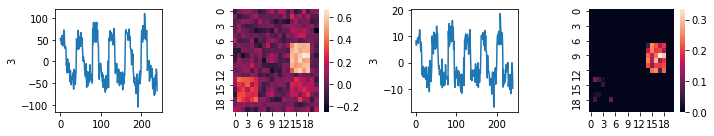

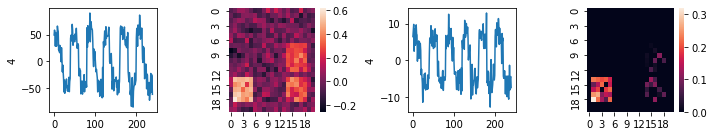

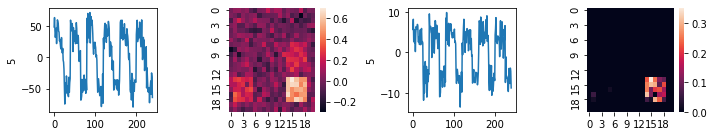

In [9]:
# Plot D and A for RR and LR 
for i in range(NUM_SOURCE):
    fig, axes = plt.subplots(1, 4, figsize=(10,2))
    sns.lineplot(data= Drr[str(i)], ax = axes[0])
    sns.heatmap(data = A_rr[i], ax = axes[1])
    sns.lineplot(data= Dlr[str(i)], ax = axes[2])
    sns.heatmap(data = A_lr[i], ax = axes[3])
    plt.tight_layout()
    plt.savefig('plots/drr_arr_dlr_alr_'+str(i+1))
    plt.show()

# Question 2.5

In [10]:
# Perform Singular Value Decomposition 
u, v, w = np.linalg.svd(TC, 5)
u_df = pd.DataFrame(u)
v_df = pd.DataFrame(v)
w_df = pd.DataFrame(w)

In [11]:
# Create a df for Z
Z = pd.DataFrame(np.dot(u_df, TC))

In [12]:
# Rename the index to correct numbering 
v_df = v_df.rename(index={0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6})

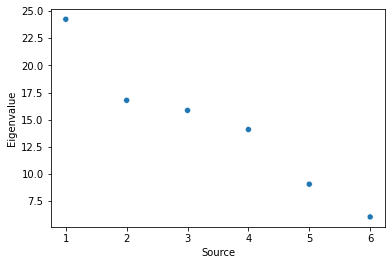

In [13]:
# Plot Eigenvalue vs Source.
ax = sns.scatterplot(data=v_df, legend = False)
ax.set(xlabel='Source', ylabel='Eigenvalue')
plt.savefig('plots/Q2-5_Eigen.png')

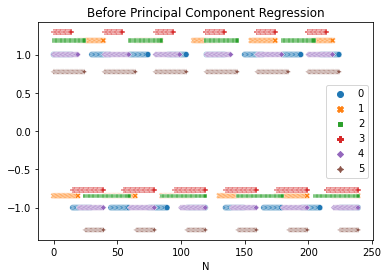

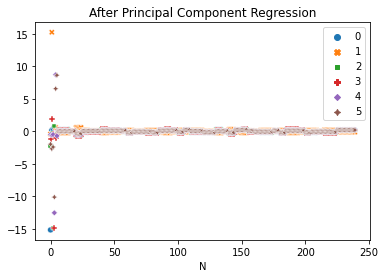

In [14]:
# Plot Before and After of Principal Component Regression.
sns.scatterplot(data=TC)
plt.xlabel("N")
plt.title("Before Principal Component Regression")
plt.savefig('plots/Q2-5_TC.png')
plt.show()

sns.scatterplot(data=Z)
plt.xlabel("N")
plt.title("After Principal Component Regression")
plt.savefig('plots/Q2-5_Z.png')
plt.show()

In [15]:
# Output the file 
Z.to_csv('datafile/Z.csv')
X.to_csv('datafile/X_Q2_5.csv')

### Next : 2.5-R.ipynb